## Observations and Insights

1)Capomulin and Ramicane had the highest count of subjects
2) As the mouse weight increased, there seemed to be less of a range in distribution of tumor volume.  The turmo volumes were more similar for higher weight mice.
3)For Capomulin mice, as time progressed, in most cases the volume decreased steadily,

## Dependencies and starter code

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

#%matplotlib notebook


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:

means= combined_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
means

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

### Summary statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


drug_reg = combined_df.groupby('Drug Regimen')

tumor_vol = drug_reg['Tumor Volume (mm3)'].sum()

mean_numpy = drug_reg.mean()["Tumor Volume (mm3)"]
var_numpy= drug_reg.var()["Tumor Volume (mm3)"]
std_np= drug_reg.std()["Tumor Volume (mm3)"]
standard_errors = drug_reg.sem()["Tumor Volume (mm3)"]


frame = {'Tumor Volume': tumor_vol, 'Mean': mean_numpy, 'Variance': var_numpy, "Standard Deviation": std_np,"Standard Error": standard_errors}
result = pd.DataFrame(frame) 
result





,Tumor Volume,Mean,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,9355.420462,40.675741,24.947764,4.994774,0.329346
Ceftamin,9361.228582,52.591172,39.290177,6.268188,0.469821
Infubinol,9413.493529,52.884795,43.128684,6.567243,0.492236
Ketapril,10384.299876,55.235638,68.553577,8.279709,0.603860
Naftisol,10105.671026,54.331565,66.173479,8.134708,0.596466
Placebo,9780.078122,54.033581,61.168083,7.821003,0.581331
Propriva,8423.930878,52.322552,42.351070,6.507770,0.512884
Ramicane,9169.417875,40.216745,23.486704,4.846308,0.320955
Stelasyn,9816.199991,54.233149,59.450562,7.710419,0.573111


In [27]:
drug_reg = combined_df.groupby('Drug Regimen')
drug_reg

## Bar plots

In [ ]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


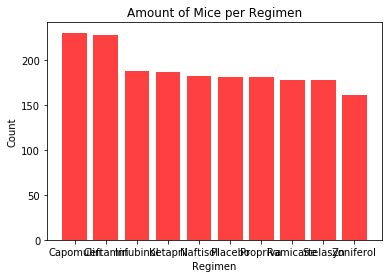

In [60]:





#figsize, ticksto change size of plot or rotate
x_axis= list(result.index)
y_axis= combined_df["Drug Regimen"].value_counts().values
plt.bar(x_axis, y_axis, facecolor="red", alpha=0.75, align="center")
plt.title('Amount of Mice per Regimen')
plt.xlabel('Regimen')
plt.ylabel('Count')
plt.show()

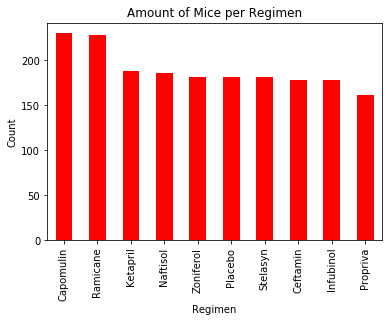

In [69]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#How?
x_axis= list(result.index)
y_axis= combined_df["Drug Regimen"].value_counts()
plt.title('Amount of Mice per Regimen')
plt.xlabel('Regimen')
plt.ylabel('Count')
y_axis.plot(kind="bar", color="red")
plt.show()

## Pie plots

Text(0.5, 1.0, 'Distribution of Samples by Gender')

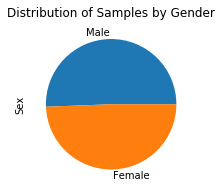

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#How?
gender_df= combined_df["Sex"].value_counts()

gender_df.plot(kind="pie", figsize=(20,3))
plt.title('Distribution of Samples by Gender')




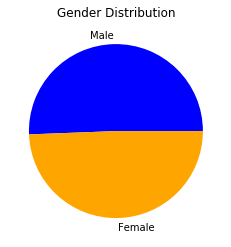

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

male= combined_df[(combined_df["Sex"] == "Male")].shape[0]
female= combined_df[(combined_df["Sex"] == "Female")].shape[0]


atype = ["Male", "Female"]
Gender = [male,female]
plt.title("Gender Distribution")
colors = ["blue", "orange"]
plt.pie(Gender, labels=atype, colors=colors)


plt.show()

In [65]:
# Calculate the final tumor volume of each mouse across four of the most promising 
#treatment regimens. 
filtered_df= result[(result.index == "Ceftamin")| (result.index == "Capomulin")| (result.index == "Ramicane")| (result.index == "Infubinol")]

filtered_df["Tumor Volume"]

Drug Regimen
Capomulin    9355.420462
Ceftamin     9361.228582
Infubinol    9413.493529
Ramicane     9169.417875
Name: Tumor Volume, dtype: float64

## Quartiles, outliers and boxplots

In [56]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.



arr= filtered_df["Tumor Volume"]
q1 = np.percentile(arr, 25)
q3 = np.percentile(arr,75)
iqr = (q3 - q1)
print("interquartile range:", iqr)







interquartile range: 373.82636650250606


In [42]:
lower_boundary = q1 - (1.5 * iqr)
lower_boundary

8422.306576093735

In [43]:
upper_boundary = q3 + (1.5 * iqr)
upper_boundary

9917.61204210376

In [44]:
arr[arr <= lower_boundary]


Series([], Name: Tumor Volume, dtype: float64)

In [45]:

arr[arr >= upper_boundary]

Series([], Name: Tumor Volume, dtype: float64)

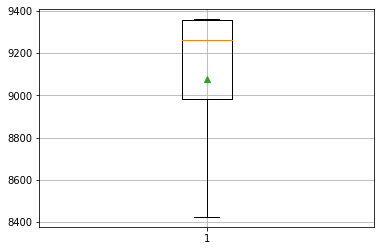

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(arr, showmeans=True)
plt.grid()
plt.show()

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

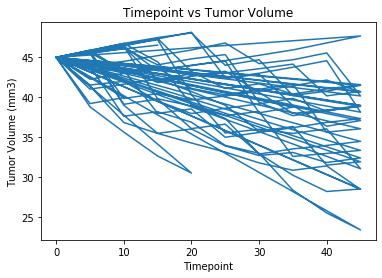

In [70]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

cap_df = combined_df[(combined_df["Drug Regimen"] == "Capomulin")]
                            
time= cap_df["Timepoint"]
volume= cap_df["Tumor Volume (mm3)"]
plt.plot(time, volume)
plt.title('Timepoint vs Tumor Volume')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

In [ ]:
#tp_series= cap_df["Time Point"]
#tumor_vol= cap_df["Tumor Volume (mm3)"]
#plt.plot(tp_series, tumor_vol)


Text(0, 0.5, 'Tumor Volume')

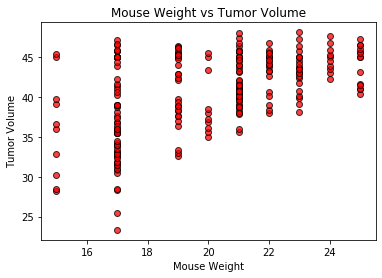

In [71]:
# Generate a scatter plot of mouse weight versus 
# average tumor volume for the Capomulin regimen
cap_df = combined_df[(combined_df["Drug Regimen"] == "Capomulin")]
                            
weight= cap_df["Weight (g)"]
volume= cap_df["Tumor Volume (mm3)"]



plt.scatter(weight, volume, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title('Mouse Weight vs Tumor Volume')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')

In [47]:
# Calculate the correlation coefficient and 
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen


cap_df = combined_df[(combined_df["Drug Regimen"] == "Capomulin")]
weight= cap_df["Weight (g)"]
volume= cap_df["Tumor Volume (mm3)"]

(slope, intercept, _, _, _) = linregress(weight, volume)
fit = slope * weight + intercept
slope

0.9609669432428346

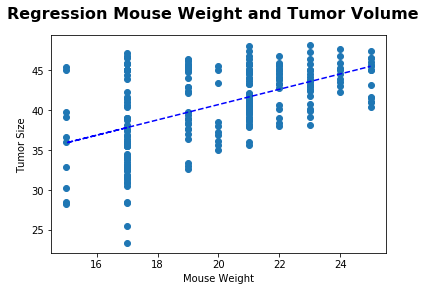

In [39]:
fig, ax = plt.subplots()

fig.suptitle("Regression Mouse Weight and Tumor Volume", fontsize=16, fontweight="bold")



ax.set_xlabel("Mouse Weight")
ax.set_ylabel("Tumor Size")

ax.plot(weight, volume, linewidth=0, marker='o')
ax.plot(weight, fit, 'b--')

plt.show()